<a href="https://colab.research.google.com/github/Tclack88/MountainProject/blob/master/mproj_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
plt.style.use('fivethirtyeight')

In [56]:
source1 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data.csv"
source2 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data2.csv"
source3 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data3.csv"
source4 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data4.csv"
source5 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data5.csv"
source6 = "https://raw.githubusercontent.com/Tclack88/MountainProject/master/climber_data6.csv"
df1 = pd.read_csv(source1)
df2 = pd.read_csv(source2)
df3 = pd.read_csv(source3)
df4 = pd.read_csv(source4)
df5 = pd.read_csv(source5)
df6 = pd.read_csv(source6)
df = pd.concat([df1,df2,df3,df4,df5,df6])
df = df[df.columns[1:]] # remove 'Unnamed: 0' column
df.years_total = df.years_total.apply(lambda x: x.split()[0])
df = df.rename(columns={'years_total':'days_total'})
df.days_total = df.days_total.astype(int)


def create_discipline(df):
  if (df.sport_count == 0) and (df.trad_count !=0):
    return 'Trad'
  elif (df.sport_count !=0) and (df.trad_count == 0):
    return 'Sport'
  elif (df.sport_count == 0) and (df.trad_count == 0):
    return 'Boulder'
  
df['discipline'] = df.apply(create_discipline,axis=1)
#df = df[df.climbs_total >= 30] # remove climber data with not very much information
#df = df[df.days_total >  500]
                   
df.head()

,days_total,climbs_total,pitches_total,route_mean,route_max,boulder_mean,boulder_max,danger_factor,solos,hardest_solo,trad_count,sport_count,locations,success,quarter_max1,quarter_max2,quarter_max3,quarter_max4,discipline
0,103,10,10,9.690,11.0,NaN,NaN,0.0,0,NaN,2,10,5,3,11.0,NaN,NaN,NaN,None
1,1725,19,29,7.675,10.3,1.763636,8.8,0.0,0,NaN,5,3,10,0,10.3,NaN,NaN,NaN,None
2,15,4,4,9.650,10.1,NaN,NaN,0.0,0,NaN,0,4,1,0,10.1,NaN,NaN,NaN,Sport
3,10,5,5,9.660,10.0,NaN,NaN,0.0,0,NaN,1,5,3,1,10.0,NaN,NaN,NaN,None
4,11,4,4,7.375,7.5,NaN,NaN,0.0,0,NaN,0,4,2,0,7.5,NaN,NaN,NaN,Sport


8.92776468297064


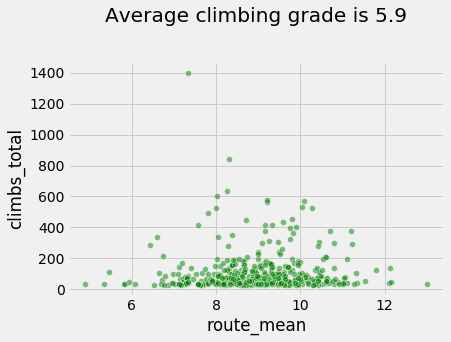

In [87]:
# C0 = 'blue'
# C1 = 'red'
# C2 = 'yellow'
print(df[df.climbs_total >= 30].route_mean.mean())
sb.scatterplot('route_mean','climbs_total',data=df[df.climbs_total >= 30],color='green',alpha=.5)
plt.title("Average climbing grade is 5.9",pad=40) ;

9.993459495351843


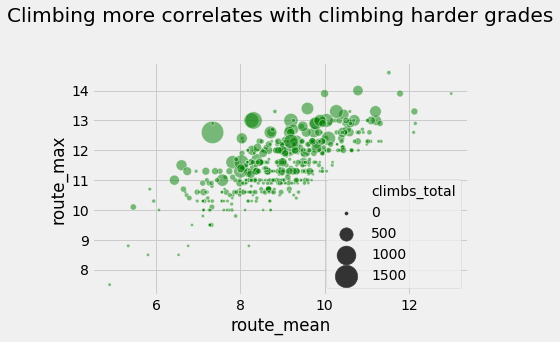

In [58]:
print(df.route_max.mean())
#cmap = sb.cubehelix_palette(rot=-.2, as_cmap=True)

sb.scatterplot('route_mean','route_max',data=df[df.climbs_total >= 30],color='green',size='climbs_total',sizes=(10,500),alpha=.5)
# climbs > 30 to remove climber data with not very much information
plt.title("Climbing more correlates with climbing harder grades",pad=40) ;

In [0]:
# sb.scatterplot('locations','route_max',data=df,color='green',size='climbs_total',sizes=(10,500),alpha=.5)
# plt.title("Climbing more correlates with climbing harder grades",pad=40) ;

Unfortunately this data is skewed. Many climbers will not begin logging their climbs early on, these are the kind of people who've climbed for years before mountain project existed or became more popular. These climbers are those who are near the axis, their average grades ARE there max grades because they've only logged one climb.

It's the climbers with thousands of pitches (even with low averages) which have the highest max grades. No climber with more than 1000 pitches has a max grade below 5.10 or possible 5.11

In [0]:
#sb.scatterplot('route_mean','route_max',data='route_max',color='green',alpha=.5)

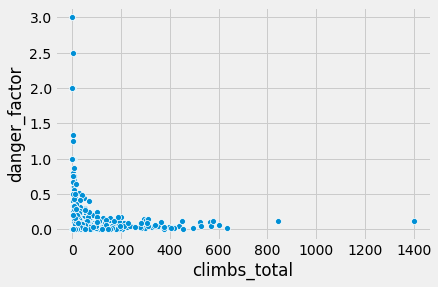

In [61]:
sb.scatterplot('climbs_total','danger_factor',data=df);

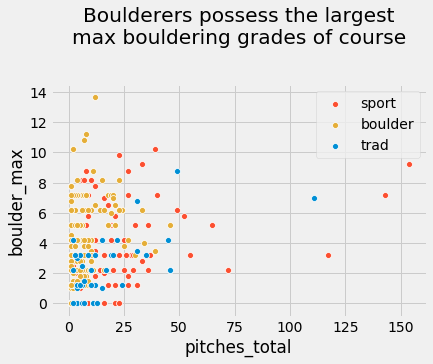

In [86]:
only_trad = df[(df.sport_count == 0) & (df.trad_count > 0)]
only_sport = df[(df.trad_count == 0) & (df.sport_count > 0)]
only_boulder = df[(df.trad_count == 0) & (df.sport_count == 0)]

sb.scatterplot(x='pitches_total',y='boulder_max',data=only_sport,color='C1')
sb.scatterplot(x='pitches_total',y='boulder_max',data=only_boulder,color='C2')
sb.scatterplot(x='pitches_total',y='boulder_max',data=only_trad,color='C0')
plt.legend(['sport','boulder','trad'])
plt.title('Boulderers possess the largest\nmax bouldering grades of course',pad=40);
# plt.axhline(y = only_boulder.boulder_max.mean(),lw=2,color='C2')
# plt.axhline(y = only_sport.boulder_max.mean(),lw=2,color='C1')
# plt.axhline(y = only_trad.boulder_max.mean(),lw=2,color='C0');
#sb.scatterplot('discipline','boulder_max',data=df)

Boulderers possess the largest max bouldering grades of course, but when taken on average, sport climbers are right up there with them.

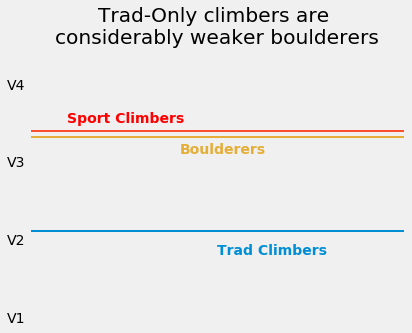

In [63]:
# plt.axhline(y = only_trad.boulder_max.mean(),lw=2,color='C0')
# plt.axhline(y = only_sport.boulder_max.mean(),lw=2,color='C1')
# plt.axhline(y = only_boulder.boulder_max.mean(),lw=2,color='C2')
plt.axhline(y = only_trad.boulder_max.mean(),lw=2,color='C0')
plt.axhline(y = only_sport.boulder_max.mean(),lw=2,color='C1')
plt.axhline(y = only_boulder.boulder_max.mean(),lw=2,color='C2')
plt.text(0.4,3.1,'Boulderers',color='C2',fontweight='bold')
plt.text(0.5,1.8,'Trad Climbers',color='C0',fontweight='bold')
plt.text(0.1,3.5,'Sport Climbers',color='red',fontweight='bold')
plt.title("Trad-Only climbers are \nconsiderably weaker boulderers",pad=40)#,fontweight = 'bold');
plt.yticks([1,2,3,4],['V1','V2','V3','V4'])
plt.xticks([])
plt.grid(False)
#plt.ylim(1,4);

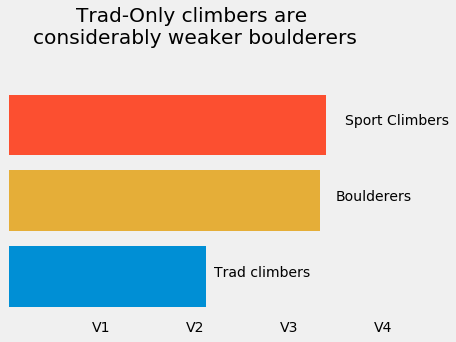

In [64]:
trad_boulder_avg = only_trad.boulder_max.mean()
sport_boulder_avg = only_sport.boulder_max.mean()
boulderer_boulder_avg = only_boulder.boulder_max.mean()
plt.barh([1,2,3],[trad_boulder_avg,boulderer_boulder_avg,sport_boulder_avg],color=['C0','C2','C1'])#,width=.3)
plt.title("Trad-Only climbers are \nconsiderably weaker boulderers",pad=40)#,fontweight = 'bold');
plt.xticks([1,2,3,4],['V1','V2','V3','V4'])
plt.yticks([])
plt.text(2.2,1,'Trad climbers')
plt.text(3.5,2,'Boulderers')
plt.text(3.6,3,'Sport Climbers')
plt.grid(False);

Regarldess of style: Bouldering or Route climbing, the average peak climbs when population is controlled is boulderers, trad climbers, then sport climbers

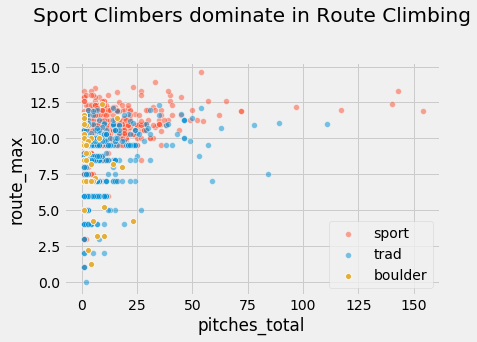

In [65]:
#plt.figure(figsize=(8,6))
sb.scatterplot(x='pitches_total',y='route_max',data=only_sport,color='C1',alpha=.5)
sb.scatterplot(x='pitches_total',y='route_max',data=only_trad,color='C0',alpha=.5)
sb.scatterplot(x='pitches_total',y='route_max',data=only_boulder,color='C2')
plt.legend(['sport','trad','boulder'])
plt.title('Sport Climbers dominate in Route Climbing',pad=40);

In [0]:
#sb.scatterplot('pitches_total','route_max',data=df,hue='discipline',hue_order=['Trad','Sport','Boulder'],alpha=.5);

In [0]:
# plt.axhline(y = only_trad.route_max.mean(),lw=2,color='C0')
# plt.axhline(y = only_sport.route_max.mean(),lw=2,color='C1')
# plt.axhline(y = only_boulder.route_max.mean(),lw=2,color='C2')
# #plt.ylim(7,10)
# plt.text(0,8,'Boulderers')
# plt.text(0,8.5,'Trad Climbers')
# plt.text(0,10,'Sport Climbers')
# plt.title('Sport-only climbers climb harder routes\nthan Trad-only climbers and boulderers',pad=40)
# plt.grid(False)
# plt.xticks([])
# plt.yticks([8,9,10],['5.8','5.9','5.10']);

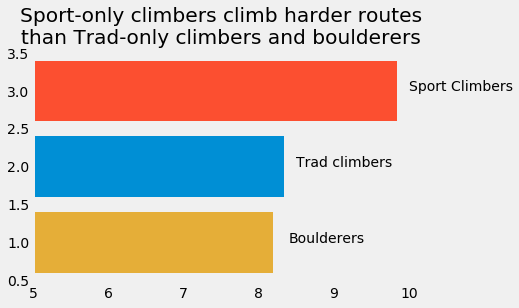

In [68]:
trad_route_avg = only_trad.route_max.mean()
sport_route_avg = only_sport.route_max.mean()
boulderer_route_avg = only_boulder.route_max.mean()
plt.barh([1,2,3],[boulderer_route_avg,trad_route_avg,sport_route_avg],color=['C2','C0','C1'])#,width=.3)
plt.title('Sport-only climbers climb harder routes\nthan Trad-only climbers and boulderers')#,pad=40)#,fontweight = 'bold');
#plt.xticks([7,8,9,10],['5.7','5.8','5.9','5.10'])
#plt.xlabel('Average Max Grade',labelpad=20)
#plt.yticks([])
plt.xlim(5,10)
plt.text(8.5,2,'Trad climbers')
plt.text(8.4,1,'Boulderers')
plt.text(10,3,'Sport Climbers')
plt.grid(False);

In [0]:
# strong_boulderers = only_boulder[only_boulder.boulder_max >= 0]
# plt.barh([1,2,3],[strong_boulderers.route_max.mean(),trad_route_avg,sport_route_avg],color=['C2','C0','C1'])

In [70]:
boulderer_route_avg

8.199999999999998

In [71]:
only_sport_route_count = only_sport.climbs_total.sum()/only_sport.shape[0]
only_trad_route_count = only_trad.climbs_total.sum()/only_trad.shape[0]
only_boulder_route_count = only_boulder.climbs_total.sum()/only_boulder.shape[0]

print(only_sport_route_count,only_trad_route_count,only_boulder_route_count)

# only_trad = df[(df.sport_count == 0) & (df.trad_count > 0)]
# only_sport = df[(df.trad_count == 0) & (df.sport_count > 0)]
# only_boulder = df[(df.trad_count == 0) & (df.sport_count == 0)]

7.213908450704225 4.706018518518518 5.686832740213523


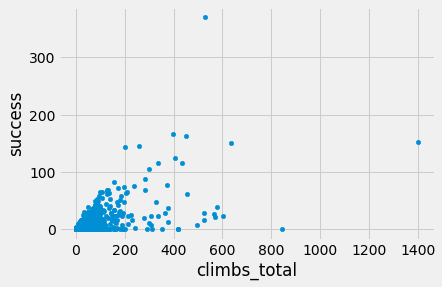

In [72]:
df.plot.scatter('climbs_total','success');

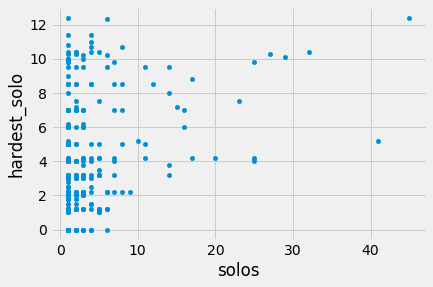

In [73]:
df.plot.scatter('solos','hardest_solo')

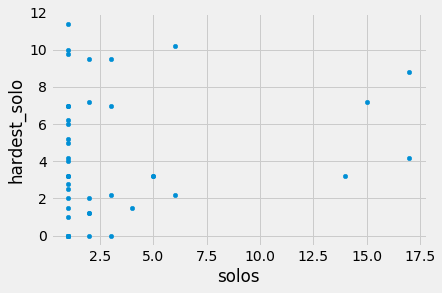

In [74]:
only_sport.plot.scatter('solos','hardest_solo')

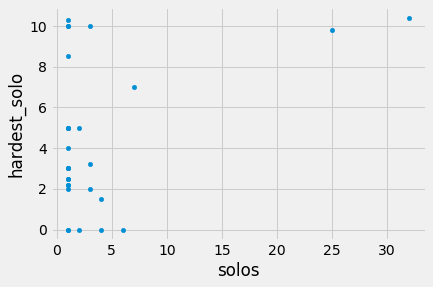

In [75]:
only_trad.plot.scatter('solos','hardest_solo')

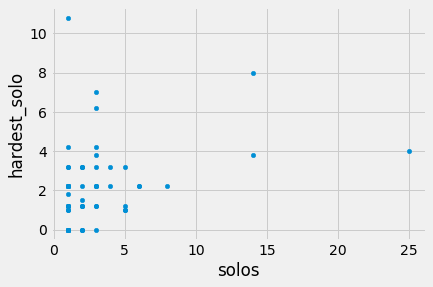

In [76]:
only_boulder.plot.scatter('solos','hardest_solo')

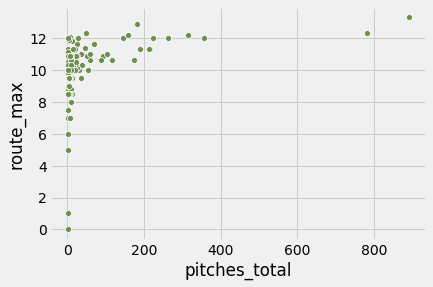

In [77]:
well_rounded = df[(df.sport_count/df.trad_count >= .9) &(df.sport_count/df.trad_count <= 1.1)]
sb.scatterplot(x='pitches_total',y='route_max',data=well_rounded,color='C3');


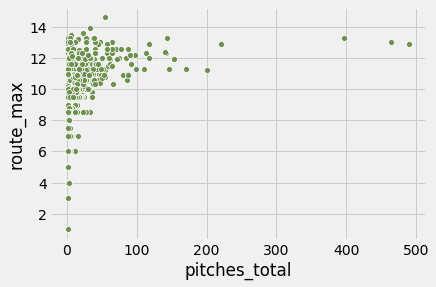

In [78]:
sport_heavy = df[(df.sport_count/df.trad_count >= 10 )]
sb.scatterplot(x='pitches_total',y='route_max',data=sport_heavy,color='C3');

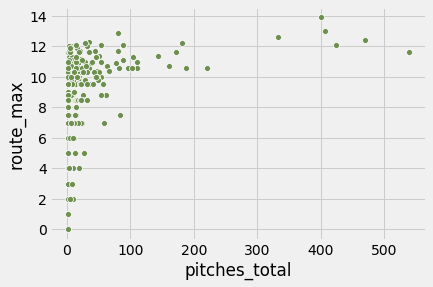

In [79]:
trad_heavy = df[(df.sport_count/df.trad_count <= .1 )]
sb.scatterplot(x='pitches_total',y='route_max',data=trad_heavy,color='C3');

In [0]:
# plt.style.use('fivethirtyeight')
# #sb.pairplot(df)

# g = sb.PairGrid(df)
# g = g.map(plt.scatter)

# xlabels,ylabels = [],[]

# for ax in g.axes[-1,:]:
#   xlabel = ax.xaxis.get_label_text()
#   xlabels.append(xlabel)
# for ax in g.axes[:,0]:
#   ylabel = ax.yaxis.get_label_text()
#   ylabels.append(ylabel)

# for i in range(len(xlabels)):
#   for j in range(len(ylabels)):
#     g.axes[j,i].xaxis.set_label_text(xlabels[i])
#     g.axes[j,i].yaxis.set_label_text(ylabels[j])

# plt.show()